## Preenchendo Dados com o Método de Interpolação Linear (Linear Interpolation)
Os datasets utilizados foram os de vazão da data 10/06/2023 da rotas pa-ba e pr-am. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Preenchendo os dados faltantes

In [67]:
def preencher_interp_linear(df):
    #Evitando alterações no database original
    df_copy = df.copy()

    # Conversão de datas para usar o método de interpolação
    df_copy['Data'] = pd.to_datetime(df_copy['Data'], dayfirst=True)

    df_copy.set_index('Data', inplace=True)

    # Criar uma coluna 'Sintético' preenchido com 1 para quando for sintético e 0 pra quuando não for
    #df['Sintético'] = np.where(df['Vazao'] == -1, '1', '0')
    
    df_copy['Vazao'] = df_copy['Vazao'].replace(-1, np.nan).interpolate(method="linear", limit_direction='backward', order=1, replace=True)

    
    return df_copy

# df = pd.read_csv("../../../datasets/intervalos-completos/vazao/dados-faltantes-gerados/bbr 06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval 3.csv")
# df = preencher_interp_linear(df)
# df.to_csv("mg-rs 06-10-2023 interp linear 3")


In [68]:
# import os

# pasta = "../../../datasets/intervalos-completos/vazao/dados-faltantes-gerados/cubic 06-10-2023"
# pasta_final = "../../../datasets/intervalos-completos/vazao\dados-preenchidos/cubic 06-10-2023/"


# def multiplas_imputacoes(caminho, caminho_final):
#     if "bbr" in caminho: tipo = "bbr"
#     elif "cubic" in caminho: tipo = "cubic"
#     for arquivo in os.listdir(caminho):
#         if "ce-sp" in arquivo: nome = "ce-sp/"
#         if "mg-rs" in arquivo: nome = "mg-rs/"
#         if "pa-ba" in arquivo: nome = "pa-ba/"
#         if "pr-am" in arquivo: nome = "pr-am/"
#         if "df-rj" in arquivo: nome = "df-rj/"
#         if arquivo.endswith('.csv') and arquivo.startswith("tratado " + tipo + " esmond"):
#             caminho_arquivo = os.path.join(caminho, arquivo)
#             df = pd.read_csv(caminho_arquivo)
#             preencher_interp_linear(df).to_csv(caminho_final + nome + "interp linear.csv")

# df = pd.DataFrame
# df = multiplas_imputacoes(pasta, pasta_final)

### Gerando datasets com dados preenchidos

In [69]:
def gerar_dataset_preenchido(df, caminho):
    df_preenchido = preencher_interp_linear(df)
    df_preenchido.to_csv(caminho, index=True)
    print(df_preenchido.head(15))

### Traçando o gráfico scatter (?)

In [70]:
# Ainda não consegui fazer funcionar 

def plot_scatter_vazao_tempo(dataset, nome):
    # Converter a coluna 'Data' para o formato datetime
    # dataset['Data'] = pd.to_datetime(dataset['Data'])
    dataset.reset_index(inplace=True)
    plt.figure(figsize=(22, 9))

    # Definir o tamanho dos pontos (diminuir o tamanho para 10)
    tamanho_ponto = 10

    # Criar o scatter plot com cores diferentes para dados sintéticos e não sintéticos
    scatter = plt.scatter(dataset['Data'], dataset['Vazao'], c=dataset['Sintético'], cmap='bwr', s=tamanho_ponto)

    # Definir os rótulos dos eixos
    plt.xlabel('Data')
    plt.ylabel('Vazao')

    # Obter os elementos únicos na coluna 'Sintético'
    unique_elements = dataset['Sintético'].unique()

    # Criar uma legenda personalizada com os rótulos para dados sintéticos e não sintéticos
    legend_labels = {0: 'Não Sintético', 1: 'Sintético'}
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(value)), markersize=5, label=legend_labels[value]) for value in unique_elements]

    # Adicionar a legenda ao plot
    plt.legend(handles=legend_elements, title='Tipo')

    # Aumentar o espaçamento entre os pontos no eixo x
    plt.xticks(ticks=dataset['Data'].iloc[::30], rotation=45)

    plt.title('Buracos de Medição nas medidas de Vazão ' + nome[0:5])

    # Mostrar o plot na tela
    plt.show()


### PLot gráfico simples

In [71]:
def plot_vazao(df):
    valid_vazao = df[df['Vazao'] != -1]['Vazao']
    plt.scatter(valid_vazao.index, valid_vazao, color='blue', label='Vazao')

def plot_vazao_sintetica(df):
    df['Vazao_Sintetica'] = np.where(df['Sintético'] == '1', df['Vazao'], np.nan)
    valid_vazao_sintetica = df[df['Vazao_Sintetica'].notnull()]['Vazao_Sintetica']
    plt.scatter(valid_vazao_sintetica.index, valid_vazao_sintetica, color='magenta', label='Vazao_Sintetica')

def plot_grafico(df):
    plt.figure(figsize=(22, 9))
    plot_vazao(df)
    plot_vazao_sintetica(df)
    plt.xlabel('Data')
    plt.ylabel('Vazão')
    plt.title('Gráfico de Pontos: Vazão vs. Tempo')
    plt.legend()
    plt.show()

### Recebendo e copiando os datasets

In [72]:
vazao_pa_ba = pd.read_csv('../../../datasets/vazao/10-06-2023/tratado/bbr/tratado bbr esmond data pa-ba 06-10-2023.csv')
vazao_pr_am = pd.read_csv('../../../datasets/vazao/10-06-2023/tratado/bbr/tratado bbr esmond data pr-am 06-10-2023.csv')

cubic_vazao_pa_ba = pd.read_csv('../../../datasets/vazao/10-06-2023/tratado/cubic/tratado cubic esmond data pa-ba 06-10-2023.csv')
cubic_vazao_pr_am = pd.read_csv('../../../datasets/vazao/10-06-2023/tratado/cubic/tratado cubic esmond data pr-am 06-10-2023.csv')
#vazao_pa_ba.to_csv("../../../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pa-ba 06-10-2023.csv", index=False)
#vazao_pr_am.to_csv("../../../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pr-am 06-10-2023.csv", index=False)

### Testando o preenchimento

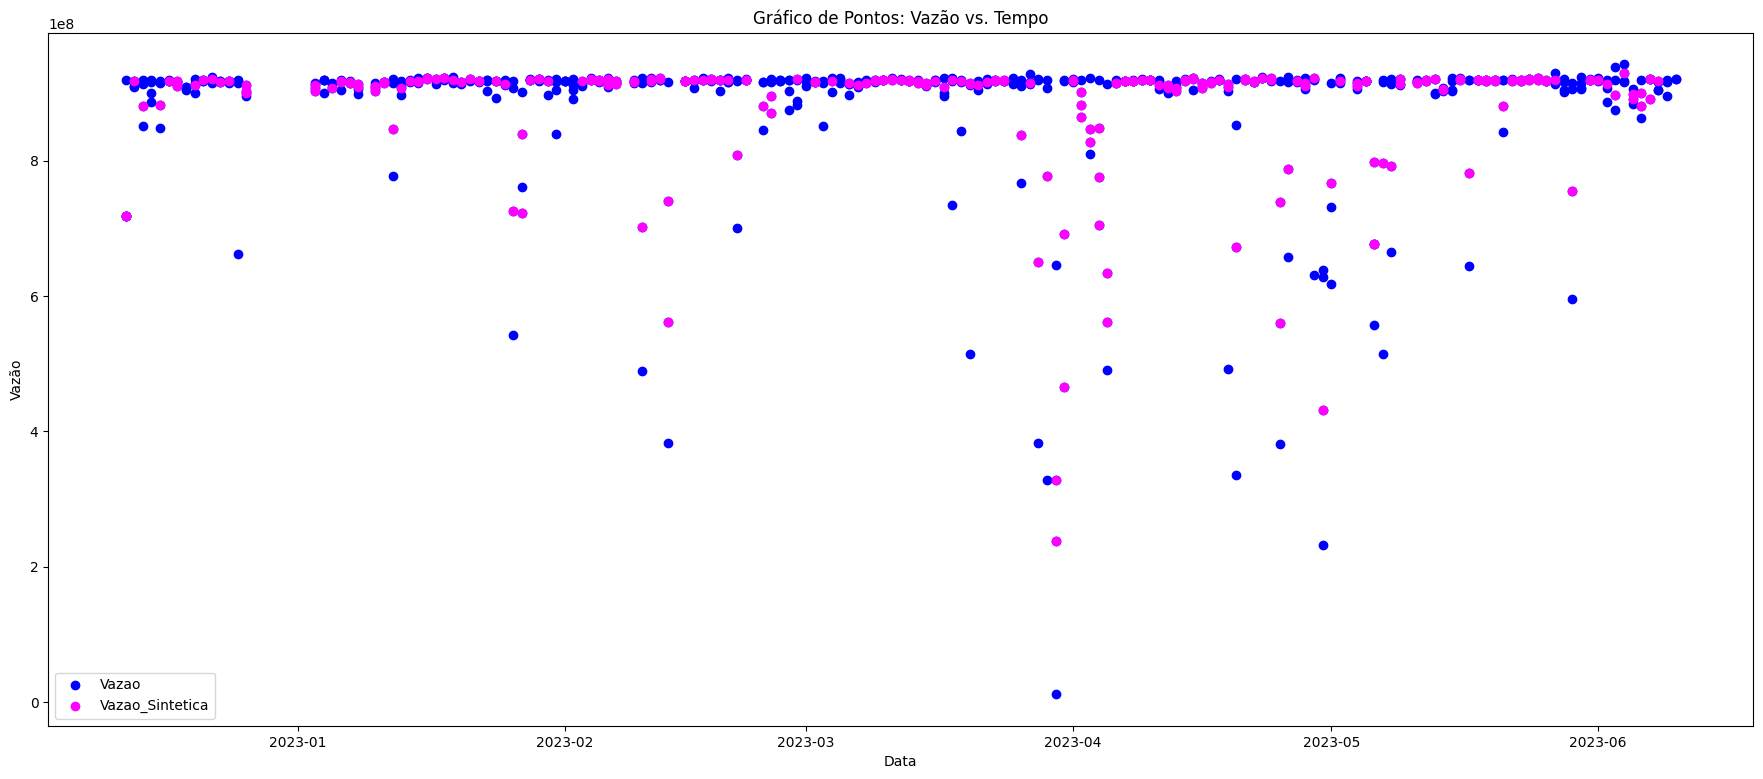

In [73]:
vazao_preenchida = vazao_pr_am
vazao_preenchida['Sintético'] = np.where(vazao_pr_am['Vazao'] == -1, '1', '0')
vazao_preenchida = preencher_interp_linear(vazao_pr_am)
vazao_preenchida
plot_grafico(vazao_preenchida)

# gerar_dataset_preenchido(vazao_pa_ba, "../../../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pa-ba 06-10-2023.csv")
# gerar_dataset_preenchido(vazao_pr_am, "../../../datasets/vazao/10-06-2023/preenchido/bbr/interpolacao/linear/preenchido bbr esmond data pr-am 06-10-2023.csv")

# gerar_dataset_preenchido(cubic_vazao_pa_ba, "../../../datasets/vazao/10-06-2023/preenchido/cubic/interpolacao/linear/preenchido cubic esmond data pa-ba 06-10-2023.csv")
# gerar_dataset_preenchido(cubic_vazao_pr_am, "../../../datasets/vazao/10-06-2023/preenchido/cubic/interpolacao/linear/preenchido cubic esmond data pr-am 06-10-2023.csv")